# McDonalds Menu Data Analysis

## Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## Reading Data

In [44]:
mc = pd.read_csv('menu.csv')
display(mc)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


## Data Understanding

In [45]:
mc.shape

(260, 24)

- This dataset has 260 row, each row represents one of the 260 items of the menu, furthermore it has 24 columns.

In [46]:
mc.columns.values


array(['Category', 'Item', 'Serving Size', 'Calories',
       'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)',
       'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
       'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium',
       'Sodium (% Daily Value)', 'Carbohydrates',
       'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'], dtype=object)

- Those are the names of the 24 columns.

## Data cleaning

In [47]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

- The dataset has numbers from column 3 to 23, whereas the first 3 columns has a mix between text and numbers.
- No column has null/missing values.

In [48]:
mc.loc[mc.duplicated()]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)


In [49]:
mc.duplicated(subset=['Item']).sum()

np.int64(0)

- The dataset has no duplicates rows.

## Descriptive statistics

In [50]:
mc.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


### Key findings

- Mean value is less than median value of each column.
- Notably large difference between 75th percentile and max vale of each variable.
- The former suggests that there are outliers in the dataset.

## Data Visualization

<Axes: >

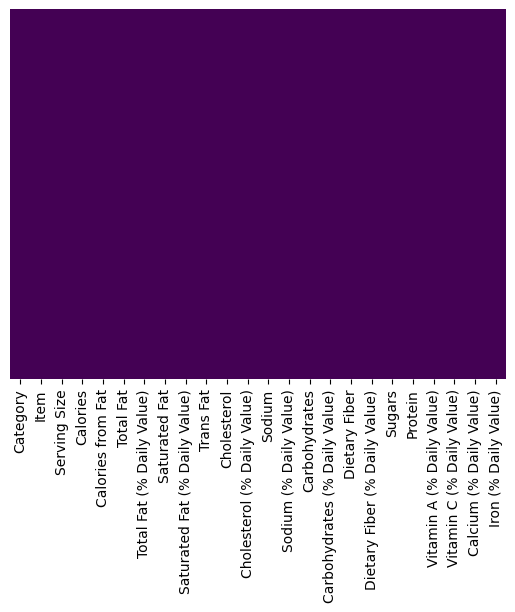

In [51]:
sns.heatmap(mc.isnull(),cbar=False,yticklabels=False,cmap='viridis')

- Dataset has no null values.

## Exploratory Analysis

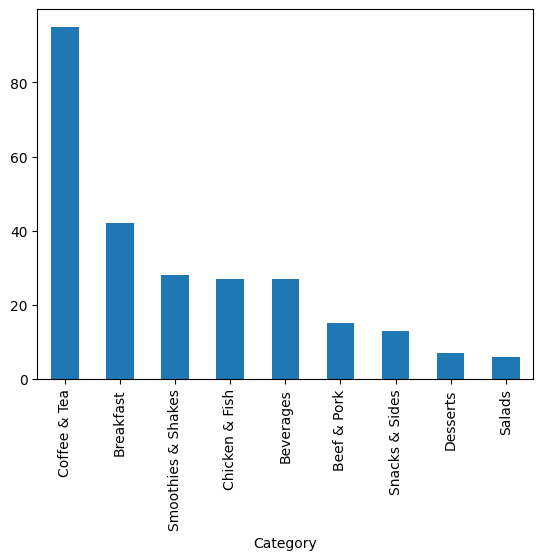

In [52]:
ax = mc['Category'].value_counts() \
    .plot(kind= 'bar')

- This graph showcases the quantity of items per category from the menu.
- There are 9 categories and a total of 260 items.
- The coffe and tea category is the largest between the drinks and the breakfast is the largest between food followed by Chiken and fish items.

### Correlation Matrix

In [53]:
mc_corr = mc[['Calories', 'Total Fat',
       'Saturated Fat','Trans Fat',
       'Cholesterol', 'Sodium', 
       'Carbohydrates', 'Dietary Fiber', 
       'Sugars', 'Protein',]].dropna().corr()

<Axes: >

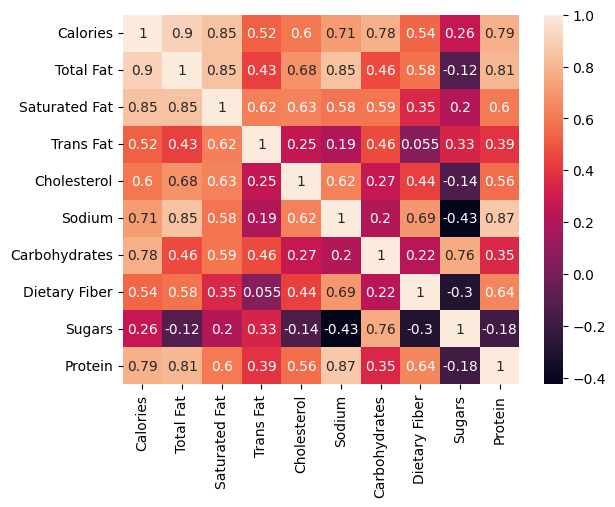

In [54]:
sns.heatmap(mc_corr, annot=True)

# Analysis

In [55]:
sb1 = mc[(mc.Category == 'Coffee & Tea') |(mc.Category == 'Smoothies & Shakes') | (mc.Category == 'Beverages')]
sb2 = mc[(mc.Category == 'Chicken & Fish')|(mc.Category == 'Beef & Pork') | (mc.Category == 'Salads') | (mc.Category == 'Breakfast')]

- I created two subset, the first has the three categories of drinks and the second has all the food or meals categories.

In [56]:
sb1.groupby('Category').agg({'Calories':['mean', 'median', 'max', 'min'],'Sugars':['mean', 'median','max', 'min'],
                       'Carbohydrates':['mean', 'median', 'max', 'min'], 'Protein':['mean', 'median','max', 'min']})

Calories                      Sugars                  \
                          mean median  max  min       mean median  max min   
Category                                                                     
Beverages           113.703704  100.0  280    0  27.851852   27.0   76   0   
Coffee & Tea        283.894737  270.0  760    0  39.610526   41.0   99   0   
Smoothies & Shakes  531.428571  540.0  930  210  77.892857   74.5  128  43   

                   Carbohydrates                    Protein                 
                            mean median  max min       mean median max min  
Category                                                                    
Beverages              28.814815   27.0   76   0   1.333333    0.0   9   0  
Coffee & Tea           44.526316   45.0  111   0   8.863158   10.0  19   0  
Smoothies & Shakes     90.428571   88.0  141  47  10.857143   12.0  21   2

In [57]:
sb2.groupby('Category').agg({'Calories':['mean', 'median', 'max', 'min'],'Trans Fat':['mean', 'median','max', 'min'],
                       'Sodium':['mean', 'median', 'max', 'min'], 'Dietary Fiber':['mean', 'median', 'max', 'min'],
                       'Protein':['mean', 'median','max', 'min']})

Calories                   Trans Fat                   \
                      mean median   max  min      mean median  max  min   
Category                                                                  
Beef & Pork     494.000000  500.0   750  240  1.100000    1.0  2.5  0.0   
Breakfast       526.666667  470.0  1150  150  0.107143    0.0  1.5  0.0   
Chicken & Fish  552.962963  480.0  1880  190  0.129630    0.0  1.0  0.0   
Salads          270.000000  255.0   450  140  0.000000    0.0  0.0  0.0   

                     Sodium                    Dietary Fiber                 \
                       mean  median   max  min          mean median max min   
Category                                                                      
Beef & Pork     1020.666667  1030.0  1470  480      2.533333    3.0   4   1   
Breakfast       1211.071429  1265.0  2290  115      3.261905    3.0   7   1   
Chicken & Fish  1257.777778  1260.0  3600  360      2.925926    3.0   6   1   
Salads           588.333333   685.0   860  150      4.500000    4.5   7   2   

                  Protein                 
                     mean median max min  
Category                                  
Beef & Pork     27.333333   24.0  48  12  
Breakfast       19.857143   19.0  36   1  
Chicken & Fish  29.111111   27.0  87   9  
Salads          19.833333   24.0  29   6

- Salads category has the healthiests items in the McDonalds Menu, they have no trans fat, low calories, high levels of dietary fiber and a good quantity of protein.
- Beef & Pork items has high levels of trans fat, but has at least one item without trans fat, It has low dietary fiber on average, but the item with the most protein.